In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
root_dir = "/content/drive/MyDrive/FoodSeg103/FoodSeg103"

In [ ]:
data = {
    "train": os.path.join(root_dir, "Images/img_dir/train"),
    "test": os.path.join(root_dir, "Images/img_dir/test"),
    "ann_train": os.path.join(root_dir, "Images/ann_dir/train"),
    "ann_test": os.path.join(root_dir, "Images/ann_dir/test")
}

In [ ]:
# sorted order for consistent pairing
all_images = sorted(os.listdir(data["train"]))

# Select index 0
dem_index = 0

# Select the image and annotation at the chosen index
image_name = all_images[dem_index]
annotation_name = image_name.replace(".jpg", ".png")

# Create the complete paths for image and annotation
image_file = os.path.join(data["train"], image_name)
annotation_file = os.path.join(data["ann_train"], annotation_name)


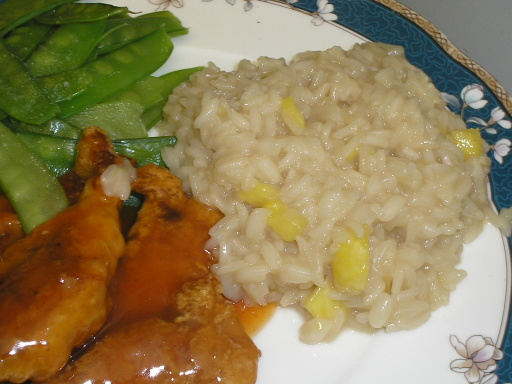

In [ ]:
image = Image.open(image_file)
display(image)

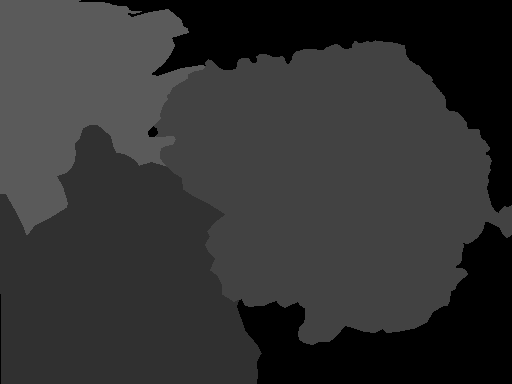

In [ ]:
annotation = Image.open(annotation_file)
display(annotation)

array([[90, 90, 90, ...,  0,  0,  0],
       [90, 90, 90, ...,  0,  0,  0],
       [90, 90, 90, ...,  0,  0,  0],
       ...,
       [ 0, 48, 48, ...,  0,  0,  0],
       [ 0, 48, 48, ...,  0,  0,  0],
       [ 0, 48, 48, ...,  0,  0,  0]], dtype=uint8)
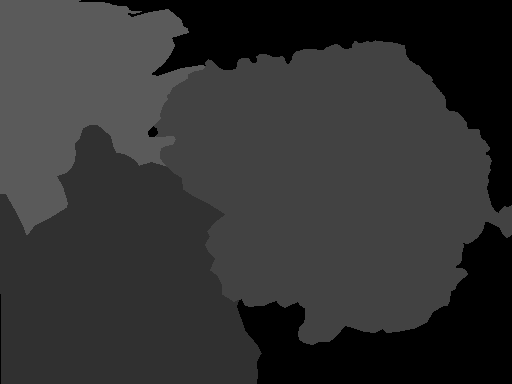

In [ ]:
import numpy as np

annotation = np.array(annotation)
annotation

In [ ]:
import numpy as np

# Assuming original_annotation is already defined and contains the segmentation map

# Define the category dictionary mapping IDs to names
category_dict = {
    0: "background", 1: "candy", 2: "egg tart", 3: "french fries", 4: "chocolate", 5: "biscuit",
    6: "popcorn", 7: "pudding", 8: "ice cream", 9: "cheese butter", 10: "cake", 11: "wine",
    12: "milkshake", 13: "coffee", 14: "juice", 15: "milk", 16: "tea", 17: "almond", 18: "red beans",
    19: "cashew", 20: "dried cranberries", 21: "soy", 22: "walnut", 23: "peanut", 24: "egg",
    25: "apple", 26: "date", 27: "apricot", 28: "avocado", 29: "banana", 30: "strawberry",
    31: "cherry", 32: "blueberry", 33: "raspberry", 34: "mango", 35: "olives", 36: "peach",
    37: "lemon", 38: "pear", 39: "fig", 40: "pineapple", 41: "grape", 42: "kiwi", 43: "melon",
    44: "orange", 45: "watermelon", 46: "steak", 47: "pork", 48: "chicken duck", 49: "sausage",
    50: "fried meat", 51: "lamb", 52: "sauce", 53: "crab", 54: "fish", 55: "shellfish", 56: "shrimp",
    57: "soup", 58: "bread", 59: "corn", 60: "hamburg", 61: "pizza", 62: "hanamaki baozi",
    63: "wonton dumplings", 64: "pasta", 65: "noodles", 66: "rice", 67: "pie", 68: "tofu",
    69: "eggplant", 70: "potato", 71: "garlic", 72: "cauliflower", 73: "tomato", 74: "kelp",
    75: "seaweed", 76: "spring onion", 77: "rape", 78: "ginger", 79: "okra", 80: "lettuce",
    81: "pumpkin", 82: "cucumber", 83: "white radish", 84: "carrot", 85: "asparagus",
    86: "bamboo shoots", 87: "broccoli", 88: "celery stick", 89: "cilantro mint", 90: "snow peas",
    91: "cabbage", 92: "bean sprouts", 93: "onion", 94: "pepper", 95: "green beans",
    96: "French beans", 97: "king oyster mushroom", 98: "shiitake", 99: "enoki mushroom",
    100: "oyster mushroom", 101: "white button mushroom", 102: "salad", 103: "other ingredients"
}

In [ ]:
print(category_dict)

{0: 'background', 1: 'candy', 2: 'egg tart', 3: 'french fries', 4: 'chocolate', 5: 'biscuit', 6: 'popcorn', 7: 'pudding', 8: 'ice cream', 9: 'cheese butter', 10: 'cake', 11: 'wine', 12: 'milkshake', 13: 'coffee', 14: 'juice', 15: 'milk', 16: 'tea', 17: 'almond', 18: 'red beans', 19: 'cashew', 20: 'dried cranberries', 21: 'soy', 22: 'walnut', 23: 'peanut', 24: 'egg', 25: 'apple', 26: 'date', 27: 'apricot', 28: 'avocado', 29: 'banana', 30: 'strawberry', 31: 'cherry', 32: 'blueberry', 33: 'raspberry', 34: 'mango', 35: 'olives', 36: 'peach', 37: 'lemon', 38: 'pear', 39: 'fig', 40: 'pineapple', 41: 'grape', 42: 'kiwi', 43: 'melon', 44: 'orange', 45: 'watermelon', 46: 'steak', 47: 'pork', 48: 'chicken duck', 49: 'sausage', 50: 'fried meat', 51: 'lamb', 52: 'sauce', 53: 'crab', 54: 'fish', 55: 'shellfish', 56: 'shrimp', 57: 'soup', 58: 'bread', 59: 'corn', 60: 'hamburg', 61: 'pizza', 62: 'hanamaki baozi', 63: 'wonton dumplings', 64: 'pasta', 65: 'noodles', 66: 'rice', 67: 'pie', 68: 'tofu', 6

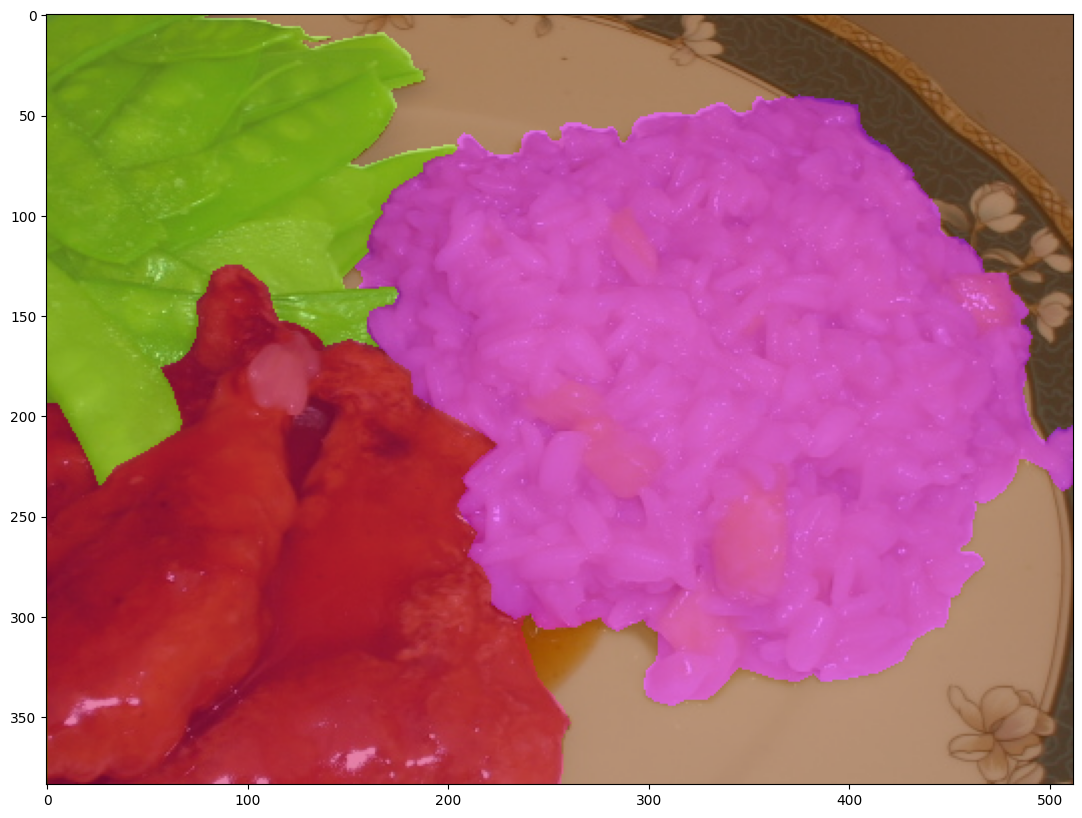

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# map every class to a random color
category = {k: list(np.random.choice(range(256), size=3)) for k,v in category_dict.items()}

def visualize_map(image, annotation):
    color_seg = np.zeros((annotation.shape[0], annotation.shape[1], 3), dtype=np.uint8) # height, width, 3
    for label, color in category.items():
        color_seg[annotation == label, :] = color

    # Show image + mask
    img = np.array(image) * 0.5 + color_seg * 0.5
    img = img.astype(np.uint8)

    plt.figure(figsize=(15, 10))
    plt.imshow(img)
    plt.show()

visualize_map(image, annotation)



In [ ]:
!pip install albumentations

In [ ]:
import torch
from torch.utils.data import Dataset
import albumentations as A

In [ ]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 18.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2


In [ ]:
import os
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
import torch
import cv2

class SegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)
        # Get a list of all mask files
        self.masks = os.listdir(mask_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.image_dir, img_name)
        # Find the corresponding mask file
        mask_name = next((m for m in self.masks if m.startswith(img_name.split('.')[0])), None)
        if mask_name is None:
            raise FileNotFoundError(f"No matching mask found for image: {img_name}")
        mask_path = os.path.join(self.mask_dir, mask_name)

        original_image = np.array(Image.open(img_path).convert("RGB"))
        # Load as grayscale
        original_annotation = np.array(Image.open(mask_path).convert("L"))

        # Ensure image and mask have the same dimensions before transformation
        if original_image.shape[:2] != original_annotation.shape[:2]:
            # Resize the mask to match the image dimensions
            # Use nearest neighbor interpolation for masks
            original_annotation = cv2.resize(original_annotation, original_image.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

        transformed = self.transform(image=original_image, mask=original_annotation)
        image = torch.tensor(transformed['image'])
        target = torch.LongTensor(transformed['mask'])
        # Return the pixel values and target separately, along with original images
        return image, target, original_image, original_annotation



In [ ]:
# Define mean and standard deviation as lists of floats
ADE_MEAN = [0.485, 0.456, 0.406]
ADE_STD = [0.229, 0.224, 0.225]

# Define transformations
train_transform = A.Compose([
    A.Resize(width=448, height=448),
    A.HorizontalFlip(p=0.5),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
])

val_transform = A.Compose([
    A.Resize(width=448, height=448),
    A.Normalize(mean=ADE_MEAN, std=ADE_STD),
])

# Define data paths
root_dir = "/content/drive/MyDrive/FoodSeg103/FoodSeg103"
data = {
    "train": os.path.join(root_dir, "Images/img_dir/train"),
    "test": os.path.join(root_dir, "Images/img_dir/test"),
    "ann_train": os.path.join(root_dir, "Images/ann_dir/train"),
    "ann_test": os.path.join(root_dir, "Images/ann_dir/test")
}

# Create datasets
train_dataset = SegmentationDataset(data["train"], data["ann_train"], transform=train_transform)
# Assuming 'test' is validation set
val_dataset = SegmentationDataset(data["test"], data["ann_test"], transform=val_transform)

In [ ]:
# Define original_annotation here
pixel_values, target, original_image, original_annotation = train_dataset[3]

print(pixel_values.shape)
print(target.shape)

torch.Size([448, 448, 3])
torch.Size([448, 448])


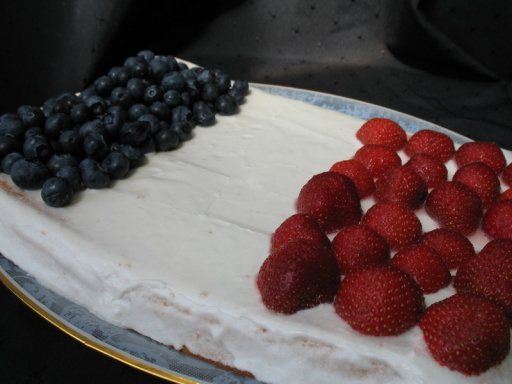

In [ ]:
from PIL import Image

Image.fromarray(original_image)

In [ ]:

[category_dict[id] for id in np.unique(original_annotation).tolist()]

['background', 'cake', 'strawberry', 'blueberry']

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(inputs):
    batch = dict()
    batch["pixel_values"] = torch.stack([i[0] for i in inputs], dim=0)
    batch["labels"] = torch.stack([i[1] for i in inputs], dim=0)
    batch["original_images"] = [i[2] for i in inputs]
    batch["original_annotation"] = [i[3] for i in inputs]

    return batch

train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, collate_fn=collate_fn)
val_dataloader = DataLoader(val_dataset, batch_size=2, shuffle=False, collate_fn=collate_fn)

In [ ]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
  if isinstance(v,torch.Tensor):
    print(k,v.shape)

pixel_values torch.Size([2, 448, 448, 3])
labels torch.Size([2, 448, 448])


In [ ]:
batch["pixel_values"].dtype

torch.float32

In [ ]:
batch["labels"].dtype

torch.int64

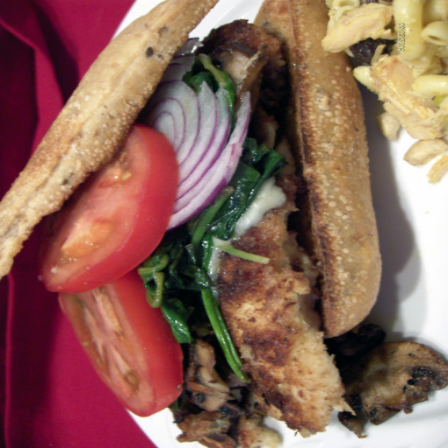

In [ ]:
from PIL import Image

# Transpose the ADE_MEAN and ADE_STD arrays to match the shape of pixel_values
unnormalized_image = (batch["pixel_values"][0].numpy() * np.array(ADE_STD)[None, None, :]) + np.array(ADE_MEAN)[None, None, :]
unnormalized_image = (unnormalized_image * 255).astype(np.uint8)

# Move the channel dimension to the last position (for PIL compatibility)
# The original code transposed the image to (1,2,0), which resulted in an incompatible shape
# Correct transposition
unnormalized_image = np.transpose(unnormalized_image, (1, 0, 2))

# Create the image
unnormalized_image = Image.fromarray(unnormalized_image)
unnormalized_image

In [ ]:
[category_dict[id] for id in torch.unique(batch["labels"][0]).tolist()]

['background',
 'chicken duck',
 'bread',
 'pasta',
 'tomato',
 'cilantro mint',
 'onion',
 'white button mushroom']

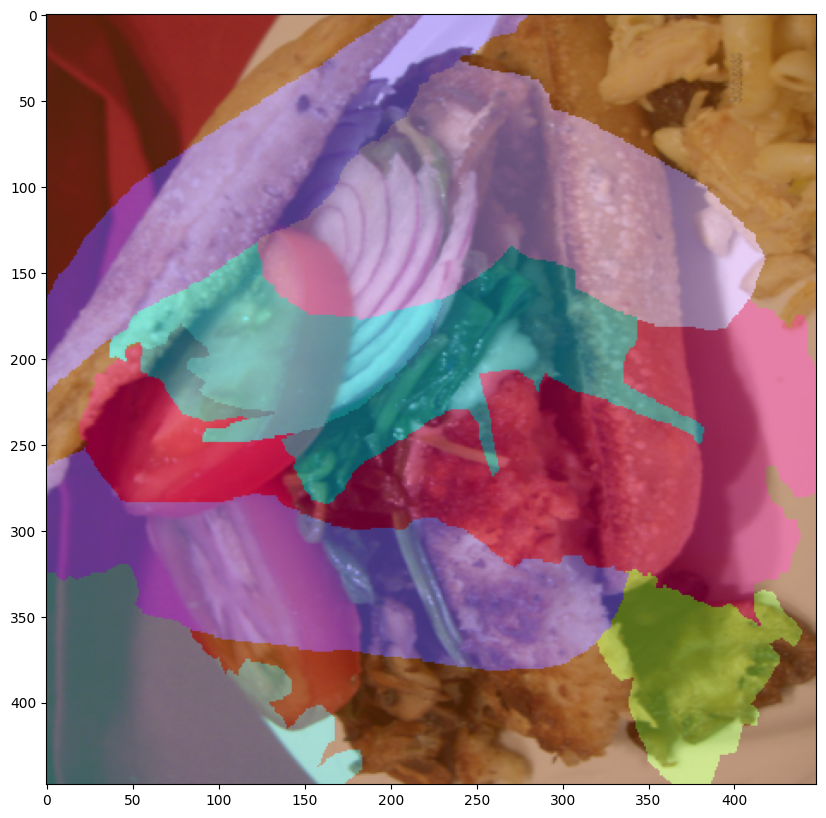

In [ ]:
visualize_map(unnormalized_image, batch["labels"][0].numpy())

### Model

In [ ]:
import torch
from transformers import Dinov2Model, Dinov2PreTrainedModel
from transformers.modeling_outputs import SemanticSegmenterOutput

class LinearClassifier(torch.nn.Module):
    def __init__(self, in_channels, tokenW=32, tokenH=32, num_labels=1):
        super(LinearClassifier, self).__init__()

        self.in_channels = in_channels
        self.width = tokenW
        self.height = tokenH
        self.classifier = torch.nn.Conv2d(in_channels, num_labels, (1,1))

    def forward(self, embeddings):
        embeddings = embeddings.reshape(-1, self.height, self.width, self.in_channels)
        embeddings = embeddings.permute(0,3,1,2)

        return self.classifier(embeddings)


class Dinov2ForSemanticSegmentation(Dinov2PreTrainedModel):
  def __init__(self, config):
    super().__init__(config)

    self.dinov2 = Dinov2Model(config)
    self.classifier = LinearClassifier(config.hidden_size, 32, 32, config.num_labels)

  def forward(self, pixel_values, output_hidden_states=False, output_attentions=False, labels=None):
    # use frozen features
    outputs = self.dinov2(pixel_values,
                            output_hidden_states=output_hidden_states,
                            output_attentions=output_attentions)
    # get the patch embeddings - exclude the CLS token
    patch_embeddings = outputs.last_hidden_state[:,1:,:]

    # convert to logits and upsample to the size of the pixel values
    logits = self.classifier(patch_embeddings)
    logits = torch.nn.functional.interpolate(logits, size=pixel_values.shape[2:], mode="bilinear", align_corners=False)

    loss = None
    if labels is not None:
      # use 0 here as ignore index instead of the default -100
      loss_fct = torch.nn.CrossEntropyLoss(ignore_index=0)
      loss = loss_fct(logits.squeeze(), labels.squeeze())

    return SemanticSegmenterOutput(
        loss=loss,
        logits=logits,
        hidden_states=outputs.hidden_states,
        attentions=outputs.attentions,
    )

In [ ]:
model = Dinov2ForSemanticSegmentation.from_pretrained("facebook/dinov2-base", num_labels=len(category_dict))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of Dinov2ForSemanticSegmentation were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.classifier.bias', 'classifier.classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
for name, param in model.named_parameters():
  if name.startswith("dinov2"):
    param.requires_grad = False

In [ ]:
# Assuming 'batch' is a dictionary containing the input data
pixel_values = batch["pixel_values"]

# Transpose the tensor to move the channel dimension to the second position
pixel_values = pixel_values.permute(0, 3, 1, 2)

# Check the shape of pixel_values
print(pixel_values.shape)

# Ensure the number of channels is 3 and the dimensions are reasonable for Dinov2
if pixel_values.shape[1] != 3:
    raise ValueError("Input images must have 3 channels (RGB).")
if pixel_values.shape[2] < 14 or pixel_values.shape[3] < 14:
    raise ValueError("Input image dimensions are too small for the model.")

# Now pass the preprocessed pixel_values to the model
outputs = model(pixel_values=pixel_values, labels=batch["labels"])
print(outputs.logits.shape)
print(outputs.loss)

torch.Size([2, 3, 448, 448])
torch.Size([2, 104, 448, 448])
tensor(4.9259, grad_fn=<NllLoss2DBackward0>)


### Train

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
import evaluate

metric = evaluate.load("mean_iou")

In [ ]:
from torch.optim import AdamW
from tqdm.auto import tqdm

# training hyperparameters
learning_rate = 5e-5
epochs = 10

optimizer = AdamW(model.parameters(), lr=learning_rate)


device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# put model in training mode
model.train()

for epoch in range(epochs):
  print("Epoch:", epoch)
  for idx, batch in enumerate(tqdm(train_dataloader)):
      pixel_values = batch["pixel_values"].permute(0, 3, 1, 2).float().to(device)  # Assuming original format is channels-last
      labels = batch["labels"].to(device)


      # forward pass
      outputs = model(pixel_values, labels=labels)
      loss = outputs.loss

      loss.backward()
      optimizer.step()

      # zero the parameter gradients
      optimizer.zero_grad()

      # evaluate
      with torch.no_grad():
        predicted = outputs.logits.argmax(dim=1)

        # metric expects predictions + labels as numpy arrays
        metric.add_batch(predictions=predicted.detach().cpu().numpy(), references=labels.detach().cpu().numpy())

      # print loss and metrics every 100 batches
      if idx % 100 == 0:
        metrics = metric.compute(num_labels=len(category_dict),
                                ignore_index=0,
                                reduce_labels=False,
        )

        print("Loss:", loss.item())
        print("Mean_iou:", metrics["mean_iou"])
        print("Mean accuracy:", metrics["mean_accuracy"])

Epoch: 0


  0%|          | 0/2492 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/datasets/features/image.py:348: UserWarning: Downcasting array dtype int64 to int32 to be compatible with 'Pillow'
  warnings.warn(f"Downcasting array dtype {dtype} to {dest_dtype} to be compatible with 'Pillow'")
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171fa060d11121d8aecfff0db80d0/mean_iou.py:259: RuntimeWarning: invalid value encountered in divide
  iou = total_area_intersect / total_area_union
/root/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--mean_iou/9e450724f21f05592bfb0255fe2fa576df8171f

Loss: 5.187516212463379
Mean_iou: 0.00014424437947989217
Mean accuracy: 0.001766783061413013
Loss: 4.362658500671387
Mean_iou: 0.0069984165064625094
Mean accuracy: 0.020022528216070017
Loss: 3.063961982727051
Mean_iou: 0.023248367874884417
Mean accuracy: 0.06384732333287117
Loss: 3.142754554748535
Mean_iou: 0.05179481595754573
Mean accuracy: 0.11019179209585424
Loss: 3.228020668029785
Mean_iou: 0.0783862905597819
Mean accuracy: 0.14009061180422186
Loss: 1.7516539096832275
Mean_iou: 0.10796021652061658
Mean accuracy: 0.18961681586827642
Loss: 2.1163129806518555
Mean_iou: 0.13117184094525822
Mean accuracy: 0.2014608050282909
Loss: 2.233930826187134
Mean_iou: 0.16134515197329405
Mean accuracy: 0.2584039233591229
Loss: 1.7974878549575806
Mean_iou: 0.16149596632279878
Mean accuracy: 0.26184746748420595
Loss: 2.0039565563201904
Mean_iou: 0.21989964646434254
Mean accuracy: 0.31576240818780965
Loss: 1.7022488117218018
Mean_iou: 0.19845617181095726
Mean accuracy: 0.28332649125514314
Loss: 1.980

ValueError: Expected input batch_size (104) to match target batch_size (448).

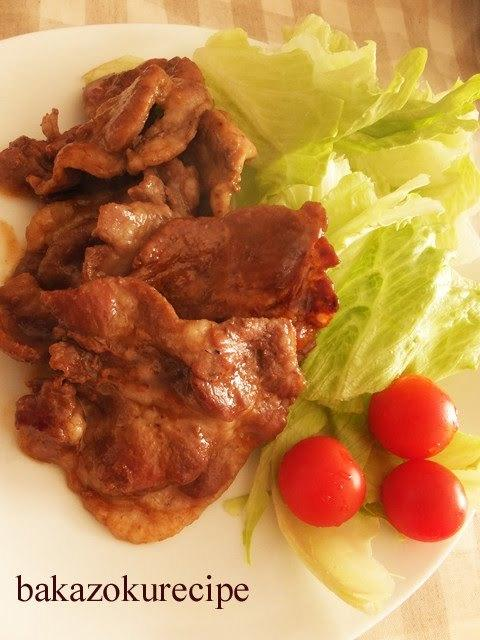

In [ ]:
from PIL import Image
import os

# Access the test directory
test_dir = data["test"]

# Get a list of image files in the test directory
image_files = [f for f in os.listdir(test_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]


# Construct the full path to the image at index 0
test_image_path = os.path.join(test_dir, image_files[1])
test_image = Image.open(test_image_path)


display(test_image)


In [ ]:
pixel_values = val_transform(image=np.array(test_image))["image"]
pixel_values = torch.tensor(pixel_values)
# convert to (batch_size, num_channels, height, width)
pixel_values = pixel_values.permute(2,0,1).unsqueeze(0)
print(pixel_values.shape)

torch.Size([1, 3, 448, 448])


In [ ]:
# forward pass
with torch.no_grad():
  outputs = model(pixel_values.to(device))

In [ ]:
upsampled_logits = torch.nn.functional.interpolate(outputs.logits,
                                                   size=test_image.size[::-1],
                                                   mode="bilinear", align_corners=False)
predicted_map = upsampled_logits.argmax(dim=1)

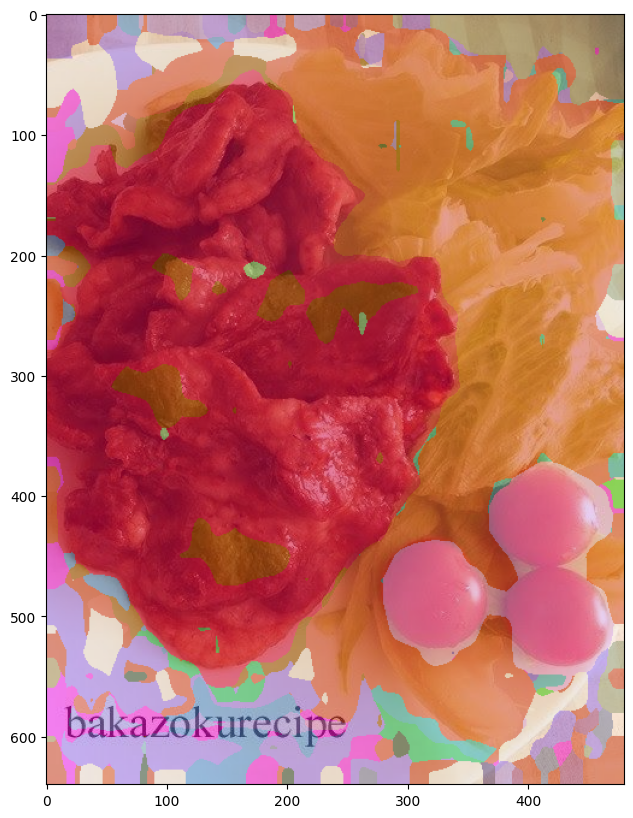

In [ ]:
visualize_map(test_image, predicted_map.squeeze().cpu())